**Filtering Spam Email Messages Using Naïve Bayes Algorithm**

If you have used Gmail, Yahoo, or any other email service, you would have noticed
that some emails are automatically marked as spam by email engines. These spam
email detectors are based on rule-based and statistical machine learning approaches.

Spam email filtering is a text classification task, where based on the text of the
email, we have to classify whether or not an email is a spam email. Supervised
machine learning is commonly used for classification, particularly if the true
outputs are available in the dataset.

The Naïve Bayes Algorithm is one of the supervised machine learning algorithms
that have been proven to be effective for spam email detection. In this project, you
will see how to detect spam emails using the Naïve Bayes algorithm implemented
via Python’s Sklearn library.

**Why Use Naïve Bayes Algorithm?**

1. Performs when there is no relationship between attributes in a feature vector.
2. Requires a very small amount of data for training.
3. Very easy to implement and understand.


Disadvantages of Naïve Bayes Algorithm

1. Unable to capture the relationships between various features in a dataset.


**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2. Load Dataset

In [3]:
spam_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Filter Spam Email/emails.csv')

In [ ]:
# Display first 5 rows
spam_data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


The above output shows that our dataset contains two columns: text and spam.

The text column contains texts of email, and the spam column contains the label 1 or 0, where 1 corresponds to spam emails and 0 corresponds to non-spam or ham emails.

In [4]:
# Display shape of dataset
spam_data.shape

(5728, 2)

There are 5728 rows and 2 columns in the dataset.

In [5]:
# Check missing and duplicate values
spam_data.isnull().sum()

text    0
spam    0
dtype: int64

There is no any missing value.

In [6]:
spam_data.duplicated().sum()

33

In [7]:
# There are 33 duplicates present in the dataset. Removed from the dataset
spam_data = spam_data.drop_duplicates()

In [8]:
spam_data.duplicated().sum()

0

There is no any duplicate in dataset.

In [9]:
spam_data['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

**3. Data Visualization**

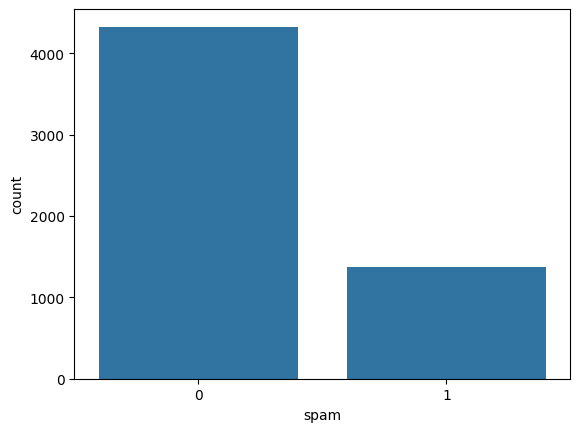

In [10]:
# Display total number of spam and not spam emails
sns.countplot(x = spam_data['spam'])
plt.show()

<Axes: ylabel='spam'>

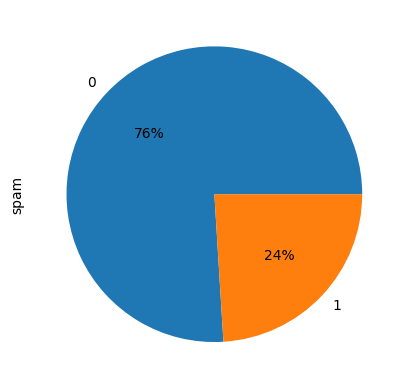

In [11]:
spam_data['spam'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

From the above pie chart, you can see that 24 percent of the emails in our dataset are spam emails

Next, we will plot word clouds for the spam and non-spam emails in our dataset. Word cloud is basically a kind of graph, which shows the most frequently occurring words in the text. The higher the frequency of occurrence, the larger will be the size of the word.

But, first we will removed all the stop words such as 'a, is, you, are, I' etc. from our dataset because these words are quite a lot and they not have any classification ability. Now remove all the stopwords from dataset.

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
stopword = stopwords.words('english')
spam_data['processed_texts'] = spam_data['text'].apply(lambda x : ' '.join([item for item in x.split() if item not in stopword]))

In [14]:
spam_data.head(10)

,text,spam,processed_texts
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible corporate iden...
1,Subject: the stock trading gunslinger fanny i...,1,Subject: stock trading gunslinger fanny merril...
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,"Subject: money , get software cds ! software c..."
5,"Subject: great nnews hello , welcome to medzo...",1,"Subject: great nnews hello , welcome medzonlin..."
6,Subject: here ' s a hot play in motion homela...,1,Subject: ' hot play motion homeland security i...
7,Subject: save your money buy getting this thin...,1,Subject: save money buy getting thing tried ci...
8,Subject: undeliverable : home based business f...,1,Subject: undeliverable : home based business g...
9,Subject: save your money buy getting this thin...,1,Subject: save money buy getting thing tried ci...


Now display the spam messages from the dataset and then plots word cloud using spam emails only.

In [15]:
spam_data_text = spam_data[spam_data['spam'] == 1]

In [17]:
from wordcloud import WordCloud

In [18]:
text = ' '.join(spam_data_text['processed_texts'])
wordcloud2 = WordCloud().generate(text)

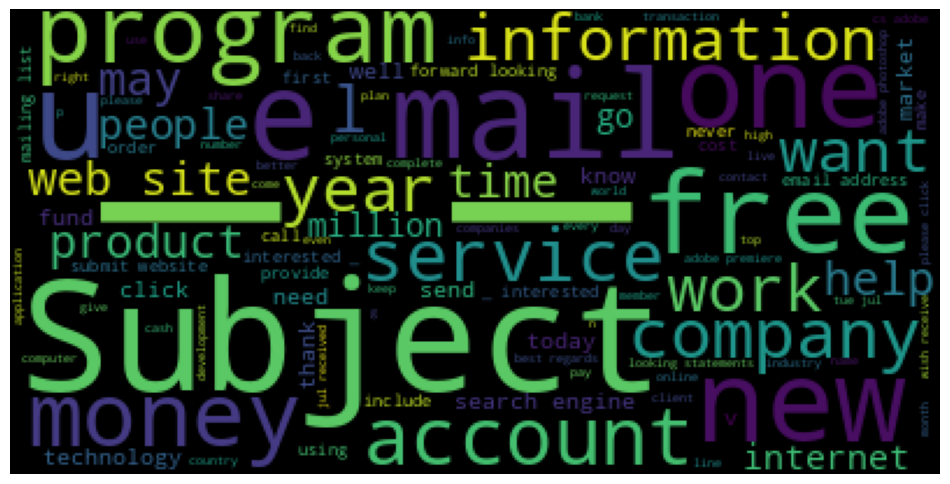

In [19]:
plt.figure(figsize = (12,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

The output shows that spam emails mostly contain a subject, and they also contain terms like money, free, thank, account, program, service, etc.


We also plot a word Cloud for non-spam emails.

In [20]:
not_spam_data = spam_data[spam_data['spam'] == 0]

In [21]:
text = ' '.join(not_spam_data['processed_texts'])
wordcloud3 = WordCloud().generate(text)

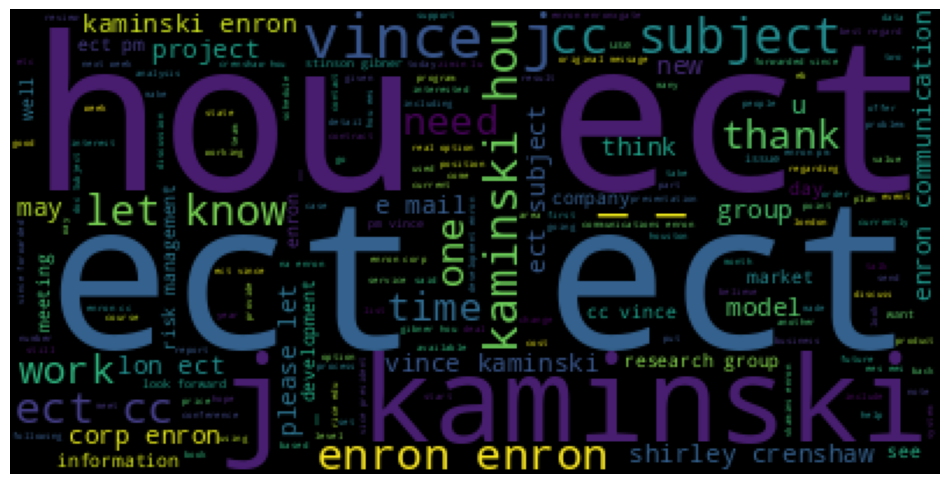

In [22]:
plt.figure(figsize = (12,10))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

You can see that non-spam emails contain mostly informal words such as thank, work, etc., time, need, etc.

**5. Data Cleaning**

Before training our machine learning model on the training data, we need to remove the special characters and numbers from our text. Removing special characters and numbers create empty spaces in the text, which also need to be removed

Before cleaning the data, lets first divide the data into email text, which forms the feature set(X), and the email labels (y) which contains the information about whether or not an email is spam email.

In [23]:
X = spam_data['processed_texts']

y = spam_data['spam']

Create clean_text() method which accepts a text string and return string that is cleaned of digits, special characters and multiple empty spaces.

In [24]:
import re

In [25]:
def clean_text(doc):
  document = re.sub('[^a-zA-Z]', ' ', doc)
  document = re.sub(r'»\s+[a-zA-Z]\s+»', ' ', document)
  document = re.sub(r'\s+', ' ', document)
  return document

In [26]:
X_sentences = []
reviews = list(X)

for rev in reviews:
  X_sentences.append(clean_text(rev))

In [27]:
spam_data.head()

,text,spam,processed_texts
0,Subject: naturally irresistible your corporate...,1,Subject: naturally irresistible corporate iden...
1,Subject: the stock trading gunslinger fanny i...,1,Subject: stock trading gunslinger fanny merril...
2,Subject: unbelievable new homes made easy im ...,1,Subject: unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,Subject: 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,"Subject: money , get software cds ! software c..."


Convert Texts to Numbers

Naïve Bayes algorithm is a statistical algorithm. Statistical algorithms work with numbers. Therefore, you need to convert the text of emails into numeric form.

There are various ways to do so, e.g., Bag of Words, TFIDF, Word Embeddings, etc. In this section, you will use the TFIDF technique for converting text to numbers.

To use the TFIDF scheme, the TfIdfVectorizer class from the sklearn.feature_extraction.text is used. You first have to call the fit() and then transform() method on the text features. Also, you can pass “stop_words = ‘english ’” as an attribute to automatically remove stop words from your text.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer(max_features = 2500, min_df = 5, max_df = 0.7)
X = vectorizer.fit_transform(X_sentences).toarray()

In the above code, the **max_features** attribute specifies that a maximum of 2,500most occurring words should be used to create a feature dictionary.

The **min_df** attribute here specifies to only include words that occur for a minimum of five times across all documents.

**Max_df** defines not to include words that occur in
more than 70 percent of the documents.


**Model Training**

The data is now ready for training a machine learning model. But first, we need to divide our data into the training and test sets. Using the training data, the naive Bayes algorithm will learn the relationship between the email text and the email label (spam or not) since both email text and corresponding labels are given in the training dataset.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Now to train machine learning model, you will be using the MultinomialNB() class from sklearn.naive_bayes module, which is one of the most frequently used machine learning model for classification. The fit() method of MultinomialNB() is used to train the model.

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

**Evaluate Model Performance**

Once a supervised machine learning model is trained, you can make predictions on the test. To do so, you can use the predict() method of the MultinomialNB().

In [35]:
y_pred = spam_detector.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
print('Confusion Matrix \n\n', confusion_matrix(y_test, y_pred))

print('\nClassification Report \n\n', classification_report(y_test, y_pred))

print('\n Accuracy Score :  ', accuracy_score(y_test, y_pred))

Confusion Matrix 

 [[838   5]
 [ 16 280]]

Classification Report 

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.98      0.95      0.96       296

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139


 Accuracy Score :   0.9815627743634767


**The output shows that our model is 98.15% accurate while predicting whether message is spam or not.**

**Making predictions on single instsance**


In [42]:
print(X_sentences[56])
print(y[56])

Subject localized software languages available hello would like offer localized software versions german french spanish uk many others aii iisted software available immediate downioad need wait week cd deiivery exampies norton lnternet security pro windows xp professionai sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx browse site find software need native ianguaqe best reqards kayieen
1


The above output shows that text and 1 i.e. email is spam.

In [43]:
# pass this sentences into our spam detector classifier
print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]


**That means your model is correctly specified the message is spam.**